In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#for decision tree visualization
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin #to wrap our estimators as sklearn estimators

import warnings
warnings.filterwarnings("ignore")

# Decision Trees

A **decision tree** over  $\mathbb{R}^p$ is a binary tree $T$ where each node is assigned a condition, which is a boolean valued function on $\mathbb{R}^p$, and a value. Let us create and visualize a decision tree over $\mathbb{R}^2$.

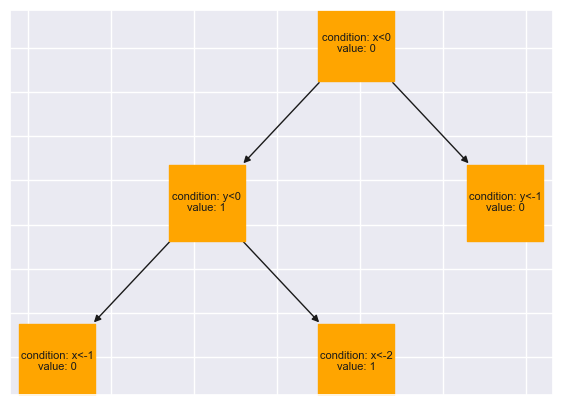

In [187]:
T=nx.DiGraph()
nodes = [
    ('0', {'condition':'x<0', 'value':0}),
    ('1', {'condition':'y<0', 'value':1}),
    ('2', {'condition':'y<-1', 'value':0}),
    ('3', {'condition':'x<-1', 'value':0}),
    ('4', {'condition':'x<-2', 'value':1}),
]
edges = [['0','1'],['0','2'],['1','3'],['1','4']]
T.add_nodes_from(nodes)
T.add_edges_from(edges)

label_dict = {}
for node in T:
    info=T.nodes[node]
    label_dict[node]="condition: {0}\nvalue: {1}".format(
        info['condition'],info['value']
    )
pos = graphviz_layout(T, prog="dot")
fig = plt.figure(figsize=(7,5))
nx.draw_networkx(T, pos, node_shape='s',node_size=3000, font_size=8, node_color='orange',labels=label_dict, with_labels=True)
plt.show()

For every decision tree $T$, we can assign a function $f_T$ on $\mathbb{R}^p$ as follows:

**def** $f_T(x)$:\
&nbsp;&nbsp; currentNode = the root of T\
&nbsp;&nbsp; **while** currentNode is not a leaf:\
&nbsp;&nbsp;&nbsp;&nbsp; **if** x satisfies the condition of currentNode:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; currentNode = the left child of the currentNode\
&nbsp;&nbsp;&nbsp;&nbsp; **else**:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; currentNode = the right child of the currentNode\
&nbsp;&nbsp; **return** the value of the currentNode

For the specific decision tree described above, we get
$$f_T(x,y) = \begin{cases}
0, & x<0, y<0 \\
1, & x<0, y\geq0 \\
0, & x \geq 0
\end{cases} 
$$

The values of the internal nodes, and the conditions of the leaf nodes are never used when we assign a function to a decision tree, but they are useful if we want to prune or extend a decision tree.